 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [18]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [19]:
# Reading whale returns
whales_data = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(whales_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [20]:
# Count nulls
whale_returns = whale_returns.replace(0, np.nan)


In [21]:
# Drop nulls
whale_returns = whale_returns.dropna()

In [22]:
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [23]:
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [24]:
# Reading algorithmic returns
algo_data = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [25]:
# Count nulls
algo_returns = algo_returns.dropna()
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [26]:
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [27]:
# Reading S&P 500 Closing Prices
sp500_data = Path("Resources/sp500_history.csv")
sp500_history = pd.read_csv(sp500_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [28]:
# Check Data Types
sp500_history.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [29]:
# Fix Data Types
sp500_history = sp500_history.replace('\$','',regex=True)
sp500_cleaned = sp500_history.astype(float)

In [30]:
sp500_cleaned.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [34]:
# Calculate Daily Returns
sp500_returns = sp500_cleaned.pct_change()


In [35]:
sp500_returns

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [36]:
# Drop nulls
sp500_returns = sp500_returns.dropna()

In [40]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns.columns = ['SP500']
sp500_returns.head()


,SP500
Date,
2012-10-01,-0.000872
2012-10-02,-0.003611
2012-10-03,-0.007123
2012-10-04,0.000322
2012-10-05,0.003469


## Combine Whale, Algorithmic, and S&P 500 Returns

In [41]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whale_returns, algo_returns, sp500_returns], axis="columns", join="inner")

In [42]:

combined_returns.sort_index(inplace=True)
combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

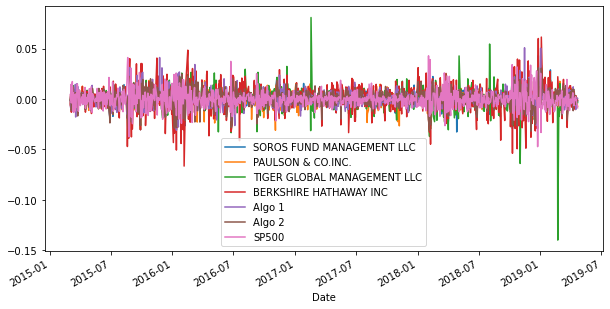

In [43]:
# Plot daily returns of all portfolios
combined_returns.plot(figsize=(10,5))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

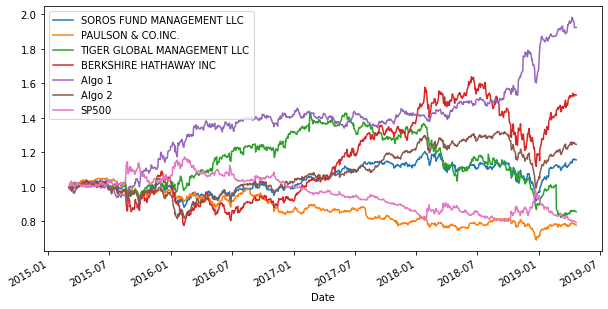

In [44]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_returns).cumprod()
# Plot cumulative returns
cumulative_returns.plot(figsize=(10,5))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

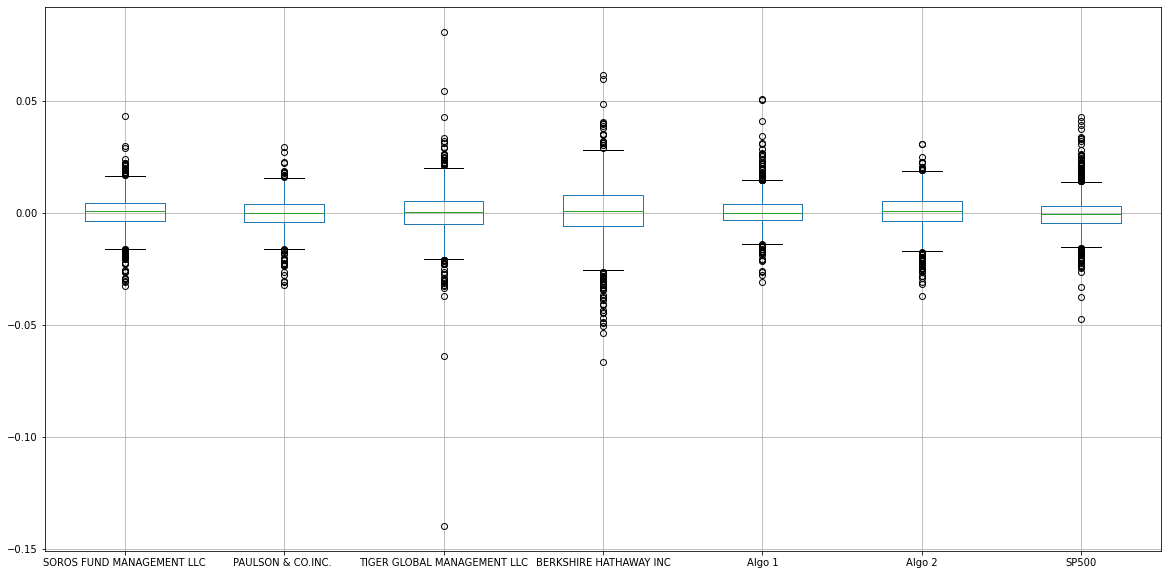

In [45]:
# Box plot to visually show risk
combined_returns.boxplot(figsize=(20,10))


### Calculate Standard Deviations

In [46]:
# Calculate the daily standard deviations of all portfolios
combined_returns.std()

SOROS FUND MANAGEMENT LLC      0.008008
PAULSON & CO.INC.              0.007125
TIGER GLOBAL MANAGEMENT LLC    0.011052
BERKSHIRE HATHAWAY INC         0.013102
Algo 1                         0.007678
Algo 2                         0.008319
SP500                          0.008612
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [47]:
volatility = combined_returns.std()
volatility.sort_values(inplace=True)
volatility

PAULSON & CO.INC.              0.007125
Algo 1                         0.007678
SOROS FUND MANAGEMENT LLC      0.008008
Algo 2                         0.008319
SP500                          0.008612
TIGER GLOBAL MANAGEMENT LLC    0.011052
BERKSHIRE HATHAWAY INC         0.013102
dtype: float64

### Calculate the Annualized Standard Deviation

In [48]:
# Calculate the annualized standard deviation (252 trading days)
combined_annual_std = combined_returns.std() * np.sqrt(252)
combined_annual_std.sort_values(inplace=True)
combined_annual_std

PAULSON & CO.INC.              0.113112
Algo 1                         0.121882
SOROS FUND MANAGEMENT LLC      0.127131
Algo 2                         0.132054
SP500                          0.136709
TIGER GLOBAL MANAGEMENT LLC    0.175450
BERKSHIRE HATHAWAY INC         0.207992
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

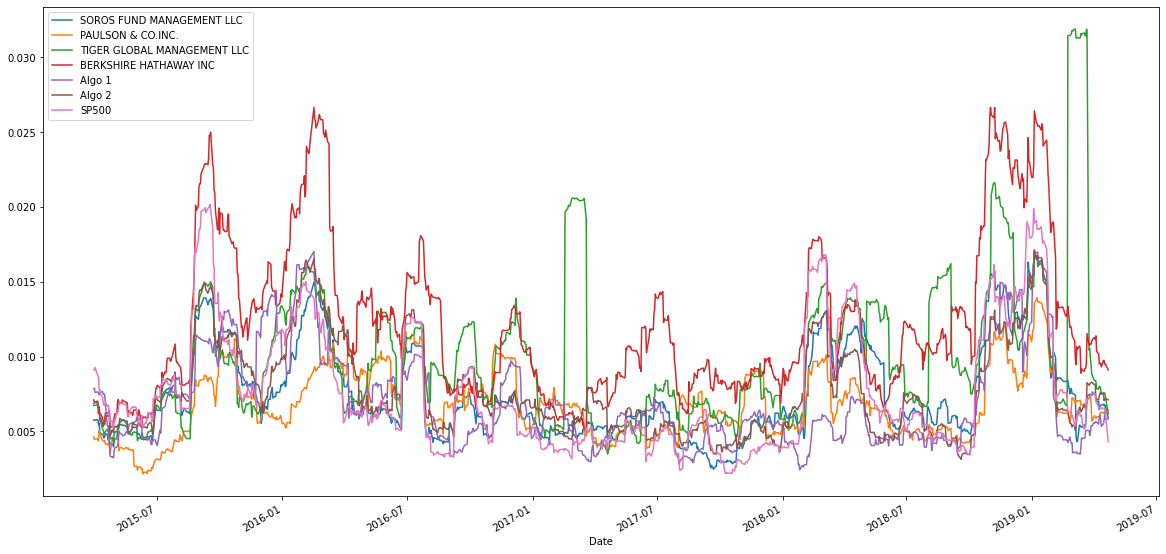

In [49]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_returns.rolling(window=21).std().plot(figsize=(20,10))
# Plot the rolling standard deviation


### Calculate and plot the correlation

In [50]:
# Calculate the correlation
correlation = combined_returns.corr()
# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
SOROS FUND MANAGEMENT LLC,1.000000,0.699856,0.561050,0.754154,0.323080,0.840785,0.000356
PAULSON & CO.INC.,0.699856,1.000000,0.434307,0.545504,0.270573,0.689604,0.014023
TIGER GLOBAL MANAGEMENT LLC,0.561050,0.434307,1.000000,0.424143,0.165273,0.515774,-0.001437
BERKSHIRE HATHAWAY INC,0.754154,0.545504,0.424143,1.000000,0.293619,0.699464,-0.014410
Algo 1,0.323080,0.270573,0.165273,0.293619,1.000000,0.285622,-0.033782
Algo 2,0.840785,0.689604,0.515774,0.699464,0.285622,1.000000,-0.000437
SP500,0.000356,0.014023,-0.001437,-0.014410,-0.033782,-0.000437,1.000000


<AxesSubplot:>

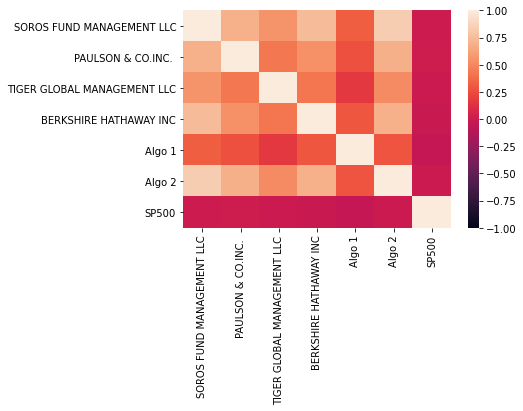

In [51]:
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

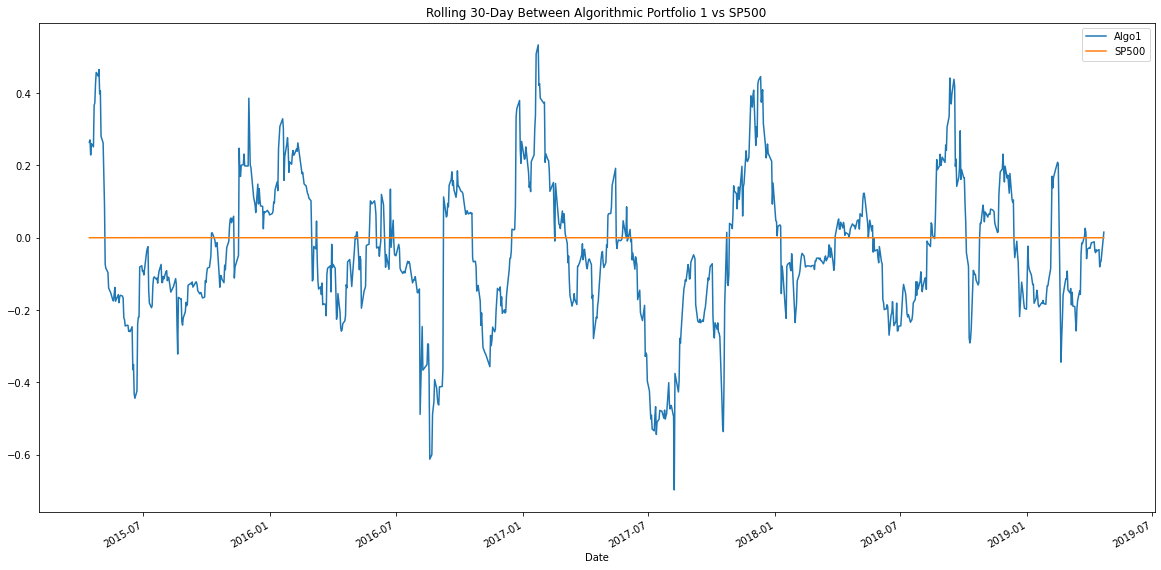

In [110]:
# Calculate covariance of a single portfolio
Algo1_covariance = combined_returns['Algo 1'].cov(combined_returns['SP500'])
# Calculate variance of S&P 500
sp500_variance = combined_returns['SP500'].var()
# Computing beta
Algo1_beta = Algo1_covariance / sp500_variance
# Plot beta trend
rolling_Algo1_covariance = combined_returns['Algo 1'].rolling(window=30).cov(combined_returns['SP500'])

rollingsp500_var = combined_returns['SP500'].rolling(window=30).var()

rolling_Algo1_beta = rolling_Algo1_covariance / rollingsp500_var
# Set the figure and plot the different datasets as multiple trends on the same figure
ax = rolling_Algo1_beta.plot(figsize=(20, 10), title='Rolling 30-Day Between Algorithmic Portfolio 1 vs SP500')
rollingsp500_var.plot(ax=ax)

# Set the legend of the figure
ax.legend(["Algo1", "SP500"])

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [ ]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [61]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_returns.mean() * 252) / (combined_returns.std() * np.sqrt(252))

In [63]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.347765
PAULSON & CO.INC.             -0.498407
TIGER GLOBAL MANAGEMENT LLC   -0.132035
BERKSHIRE HATHAWAY INC         0.615371
Algo 1                         1.396532
Algo 2                         0.481300
SP500                         -0.354682
dtype: float64

<AxesSubplot:>

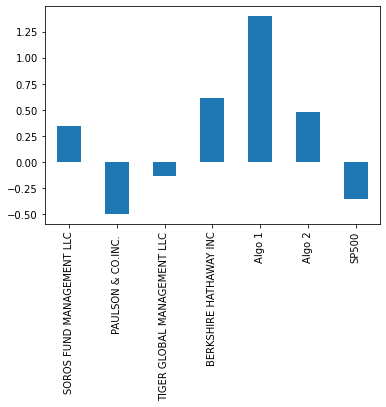

In [66]:
sharpe_ratios.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [71]:
# Reading data from 1st stock
goog_data = Path("Resources/goog_historical.csv")

In [72]:
# Reading data from 2nd stock
aapl_data = Path("Resources/aapl_historical.csv")

In [74]:
# Reading data from 3rd stock
cost_data = Path("Resources/cost_historical.csv")


goog_df = pd.read_csv(goog_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
aapl_df = pd.read_csv(aapl_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
cost_df = pd.read_csv(cost_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)

In [81]:
# Combine all stocks in a single DataFrame
newportfolio_df = pd.concat([goog_df,aapl_df,cost_df], axis="columns", join="inner")
newportfolio_df.head()

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2019-05-09,GOOG,1162.38,AAPL,200.72,COST,243.47
2019-05-08,GOOG,1166.27,AAPL,202.90,COST,241.34
2019-05-07,GOOG,1174.10,AAPL,202.86,COST,240.18
2019-05-06,GOOG,1189.39,AAPL,208.48,COST,244.23
2019-05-03,GOOG,1185.40,AAPL,211.75,COST,244.62


In [83]:
# Reset Date index
newportfolio_df.sort_index(inplace=True)
newportfolio_df.head()

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2018-05-11,GOOG,1098.26,AAPL,188.59,COST,195.76
2018-05-14,GOOG,1100.20,AAPL,188.15,COST,195.88
2018-05-15,GOOG,1079.23,AAPL,186.44,COST,195.48
2018-05-16,GOOG,1081.77,AAPL,188.18,COST,198.71
2018-05-17,GOOG,1078.59,AAPL,186.99,COST,199.60


In [84]:
newportfolio_df.drop(columns=['Symbol', 'Symbol', 'Symbol'], inplace=True)

In [91]:
# Reorganize portfolio data by having a column per symbol
newportfolio_df.columns=['GOOG', 'AAPL', 'COST']
newportfolio_df

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60
...,...,...,...
2019-05-03,1185.40,211.75,244.62
2019-05-06,1189.39,208.48,244.23
2019-05-07,1174.10,202.86,240.18


In [90]:
# Calculate daily returns
newportfolio_returns = newportfolio_df.pct_change()
# Drop NAs
newportfolio_returns.isnull().sum()
newportfolio_returns.dropna()
# Display sample data


,GOOG,AAPL,COST
Trade DATE,,,
2018-05-14,0.001766,-0.002333,0.000613
2018-05-15,-0.019060,-0.009088,-0.002042
2018-05-16,0.002354,0.009333,0.016523
2018-05-17,-0.002940,-0.006324,0.004479
2018-05-18,-0.011339,-0.003637,-0.003206
...,...,...,...
2019-05-03,0.019602,0.012431,0.007953
2019-05-06,0.003366,-0.015443,-0.001594
2019-05-07,-0.012855,-0.026957,-0.016583


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [93]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns_wtd = newportfolio_returns.dot(weights)
portfolio_returns_wtd.head()
# Display sample data


Trade DATE
2018-05-11         NaN
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [95]:
# Join your returns DataFrame to the original returns DataFrame
all_portfolio_returns = pd.concat([newportfolio_returns,combined_returns], axis="columns", join="inner")
all_portfolio_returns.head()

,GOOG,AAPL,COST,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
2018-05-11,NaN,NaN,NaN,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,-0.000883
2018-05-15,-0.019060,-0.009088,-0.002042,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044
2018-05-16,0.002354,0.009333,0.016523,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857
2018-05-17,-0.002940,-0.006324,0.004479,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639
2018-05-18,-0.011339,-0.003637,-0.003206,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333


In [97]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_portfolio_returns.dropna(inplace=True)
all_portfolio_returns.head()

,GOOG,AAPL,COST,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
2018-05-15,-0.019060,-0.009088,-0.002042,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044
2018-05-16,0.002354,0.009333,0.016523,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857
2018-05-17,-0.002940,-0.006324,0.004479,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639
2018-05-18,-0.011339,-0.003637,-0.003206,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333
2018-05-21,0.012397,0.007085,0.003317,0.002503,-0.001195,-0.001153,0.010370,-0.003092,0.004924,0.003146


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [100]:
# Calculate the annualized `std`
all_annual_std = all_portfolio_returns.std() * np.sqrt(252)
all_annual_std.sort_values(inplace=True)
all_annual_std



PAULSON & CO.INC.              0.118192
Algo 1                         0.134939
Algo 2                         0.140306
SOROS FUND MANAGEMENT LLC      0.148398
SP500                          0.153523
COST                           0.214015
TIGER GLOBAL MANAGEMENT LLC    0.235404
BERKSHIRE HATHAWAY INC         0.249979
GOOG                           0.257300
AAPL                           0.300008
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

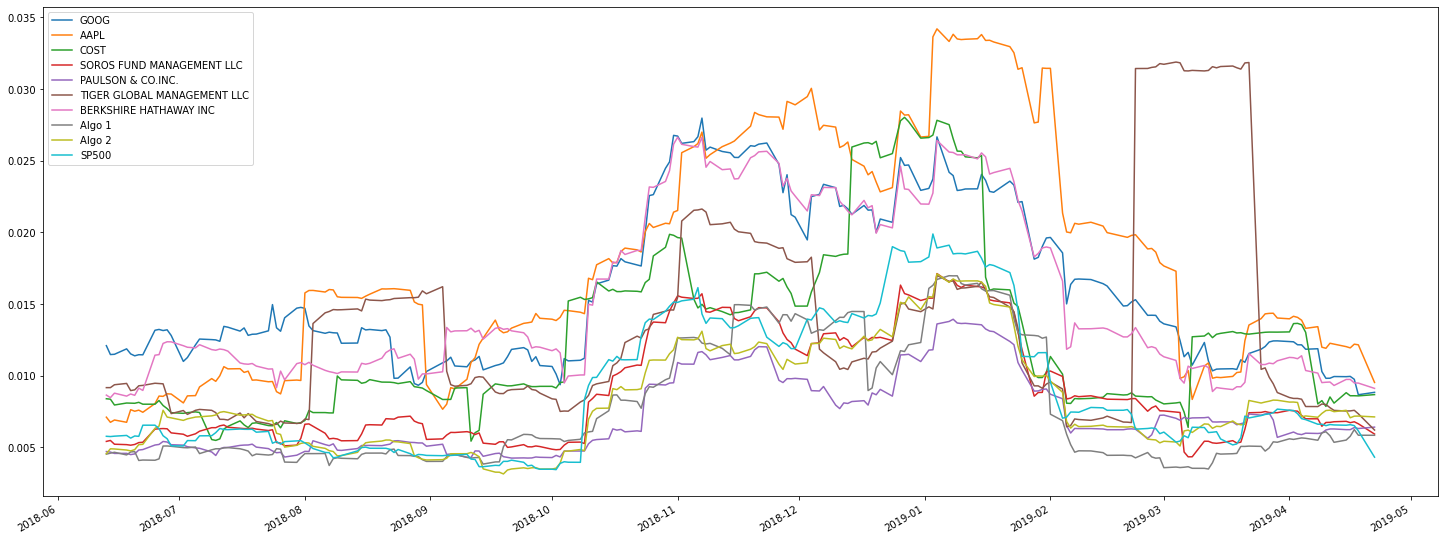

In [116]:
# Calculate rolling standard deviation
all_rolling = all_portfolio_returns.rolling(window=21).std()
# Plot rolling standard deviation
all_rolling.plot(figsize=(25,10))

### Calculate and plot the correlation

<AxesSubplot:>

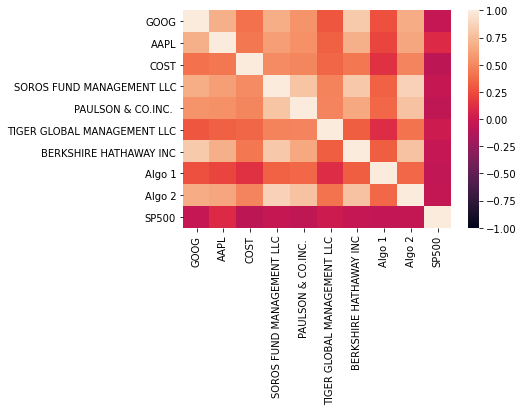

In [121]:
# Calculate and plot the correlation
all_correllations = all_portfolio_returns.corr()
sns.heatmap(all_correllations, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [126]:
# Calculate and plot Beta
rolling_goog_covariance = all_portfolio_returns['GOOG'].rolling(window=60).cov(all_portfolio_returns['SP500'])
rolling_aapl_covariance = all_portfolio_returns['AAPL'].rolling(window=60).cov(all_portfolio_returns['SP500'])
rolling_cost_covariance = all_portfolio_returns['COST'].rolling(window=60).cov(all_portfolio_returns['SP500'])

# Calculate 60-day rolling variance of S&P 500
sp500rolling_variance = all_portfolio_returns['SP500'].rolling(window=60).var()


rolling_goog_beta = rolling_goog_covariance / sp500rolling_variance
rolling_aapl_beta = rolling_aapl_covariance / sp500rolling_variance
rolling_cost_beta = rolling_cost_covariance / sp500rolling_variance

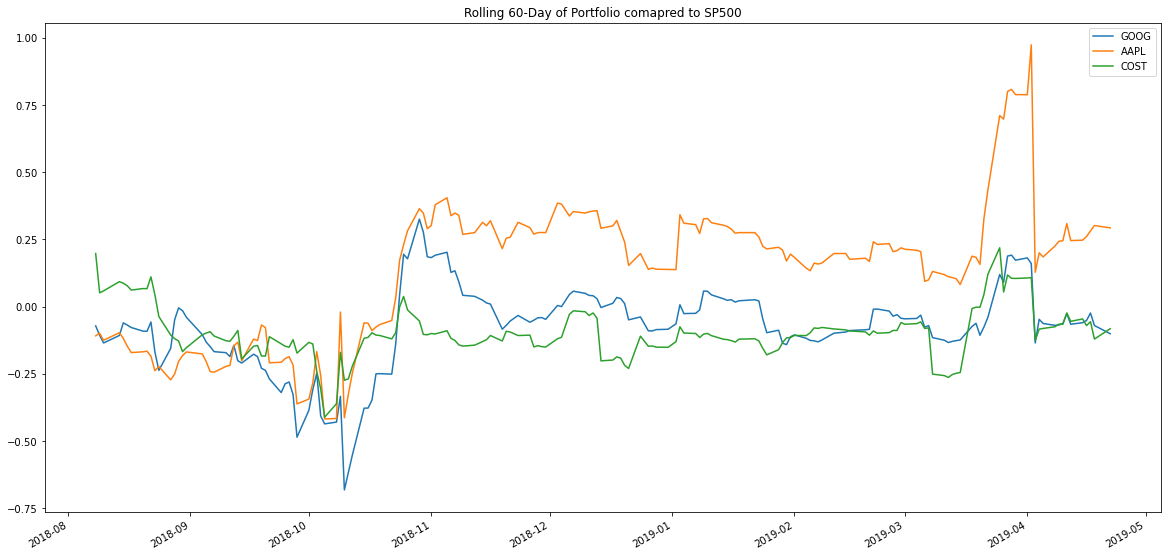

In [129]:
ax = rolling_goog_beta.plot(figsize=(20, 10), title='Rolling 60-Day of Portfolio comapred to SP500')
rolling_aapl_beta.plot(ax=ax)
rolling_cost_beta.plot(ax=ax)


# Set the legend of the figure
ax.legend(["GOOG", "AAPL", "COST"])

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [130]:
# Calculate Annualzied Sharpe Ratios
all_sharpe_ratios = (all_portfolio_returns.mean() * 252) / (all_portfolio_returns.std() * np.sqrt(252))

<AxesSubplot:>

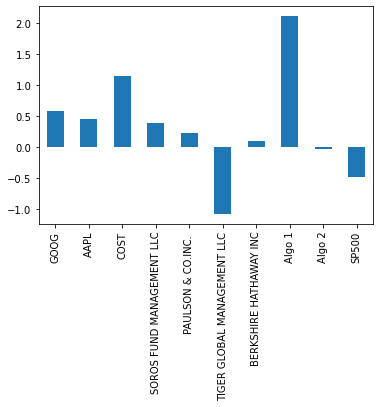

In [131]:
# Visualize the sharpe ratios as a bar plot
all_sharpe_ratios.plot.bar()

### How does your portfolio do?

Write your answer here!

In [133]:
print(f"As we can see from the bar plot, our portfolio outperformed all portfolios except the first Algorithmic Portfolio")

As we can see from the bar plot, our portfolio outperformed all portfolios except the first Algorithmic Portfolio
